# Mobile App User Behaviour - Data Wrangling

**Importing the necessary libraries, dataset and creating an overview report using pandas profiling**

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
sns.set()

In [2]:
# Importing dataset as pandas dataframe
all_data = pd.read_excel('./Data/mobile_app_user_dataset_1.xlsx', sheet_name='Sheet1', header=0, index_col=0)

In [3]:
# Understanding the dataframe
pandas_profiling.ProfileReport(all_data)

C:\Users\JadhavJa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,161
Number of observations,10208
Total Missing (%),71.5%
Total size in memory,12.5 MiB
Average record size in memory,1.3 KiB
Numeric,44
Categorical,13
Boolean,101
Date,2
Text (Unique),0
Rejected,1


**Transforming some numerical data to categorical columns**

The column 'Browsers' has some same values but differently formattted. Here, we combine those together.

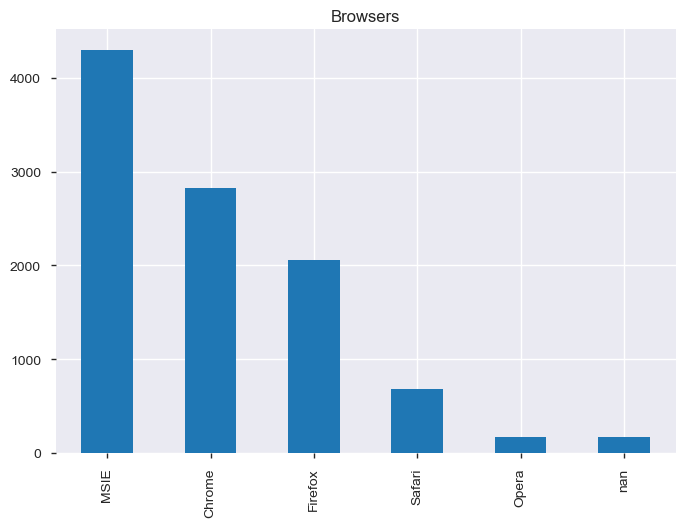

In [4]:
browsers = {'msie': 'MSIE', 'Safari iPhone': 'Safari', 'Mozilla': 'Firefox'}
all_data['browser'].replace(browsers, inplace=True)
all_data.browser.value_counts(dropna=False).plot(kind='bar', title='Browsers')

The data collected from the survey was coded numerically for many features, we transform it back to the original string values that are readable.

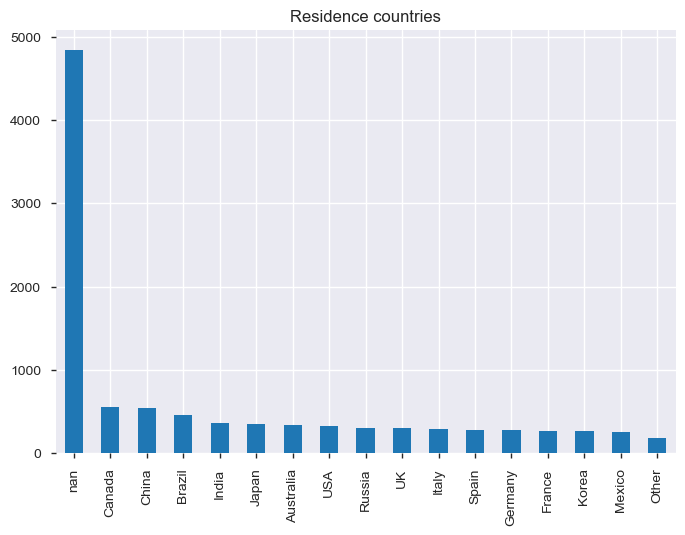

In [5]:
countries = {1:'Australia', 2:'Brazil', 3:'Canada', 4:'China', 5:'France', 6:'Germany', 7:'India', 8:'Italy', 9:'Japan', 10:'Mexico', 11:'Korea', 12:'Russia', 13:'Spain', 14:'UK', 15:'USA', 16:'Other'}
all_data.residence.replace(countries, inplace=True)
all_data.residence.value_counts(dropna=False).plot(kind='bar', title='Residence countries')

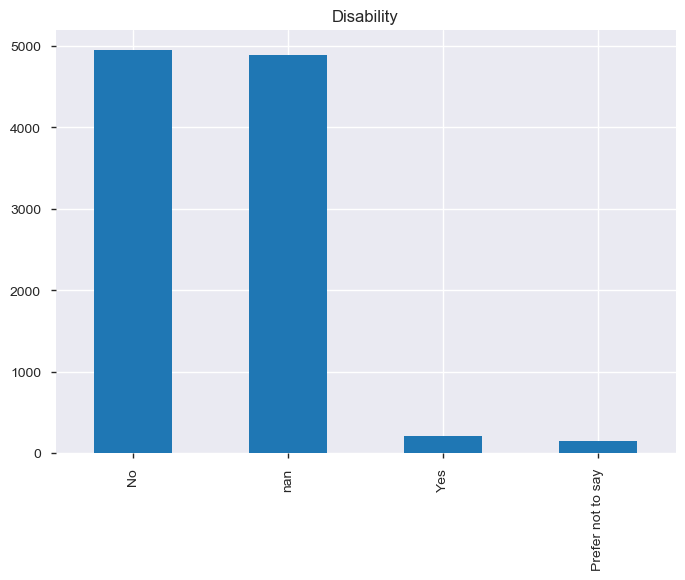

In [6]:
disabilities = {1:'Yes', 2:'No', 3:'Prefer not to say'}
all_data.disability.replace(disabilities, inplace=True)
all_data.disability.value_counts(dropna=False).plot(kind='bar', title='Disability')

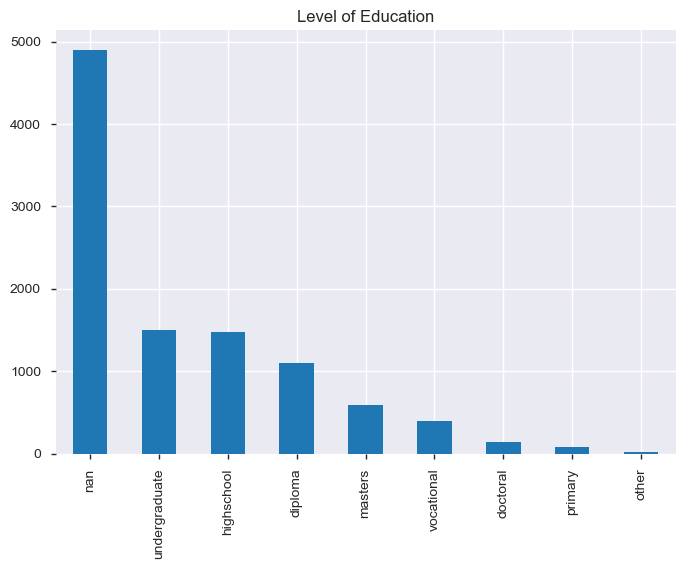

In [7]:
edu_levels = {1:'primary', 2:'highschool', 3:'diploma', 4:'vocational', 5:'undergraduate', 6:'masters', 7:'doctoral', 8:'other'}
all_data.level_of_education.replace(edu_levels, inplace=True)
all_data.level_of_education.value_counts(dropna=False).plot(kind='bar', title='Level of Education')

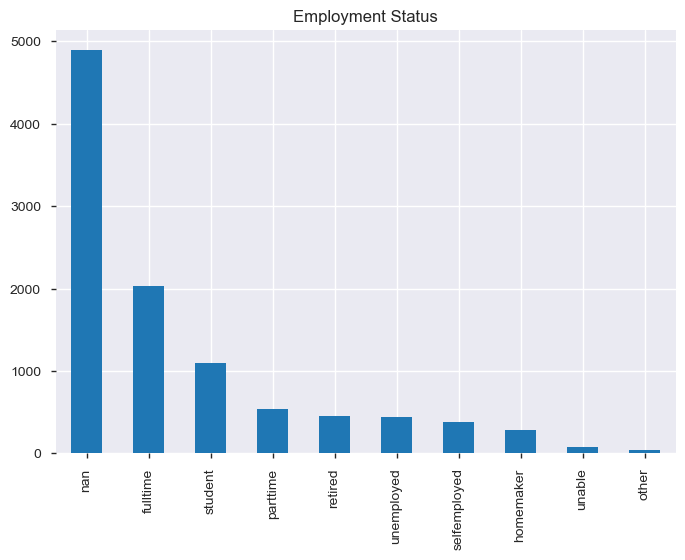

In [8]:
employments = {1:'fulltime', 2:'parttime', 3:'selfemployed', 4:'student', 5:'homemaker', 6:'unemployed', 7:'unable', 8:'retired', 9:'other'}
all_data.employment_status.replace(employments, inplace=True)
all_data.employment_status.value_counts(dropna=False).plot(kind='bar', title='Employment Status')

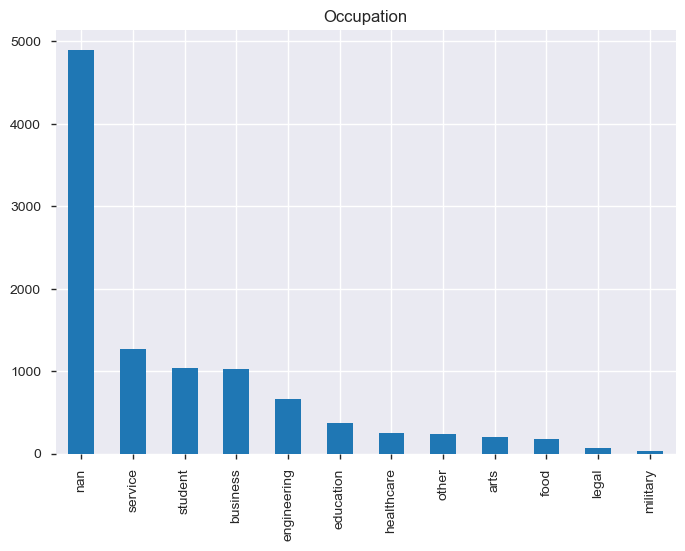

In [9]:
occupations = {1:'business', 2:'business', 3:'engineering', 4:'engineering', 5:'engineering', 6:'service', 7:'legal', 8:'education', 9:'arts', 10:'healthcare', 11:'healthcare', 12:'service', 13:'food', 14: 'service', 15: 'service', 16:'business', 17:'service', 18:'food', 19:'engineering', 20:'service', 21:'service', 22:'service', 23:'military', 24:'student', 25:'other'}
all_data.occupation.replace(occupations, inplace=True)
all_data.occupation.value_counts(dropna=False).plot(kind='bar', title='Occupation')

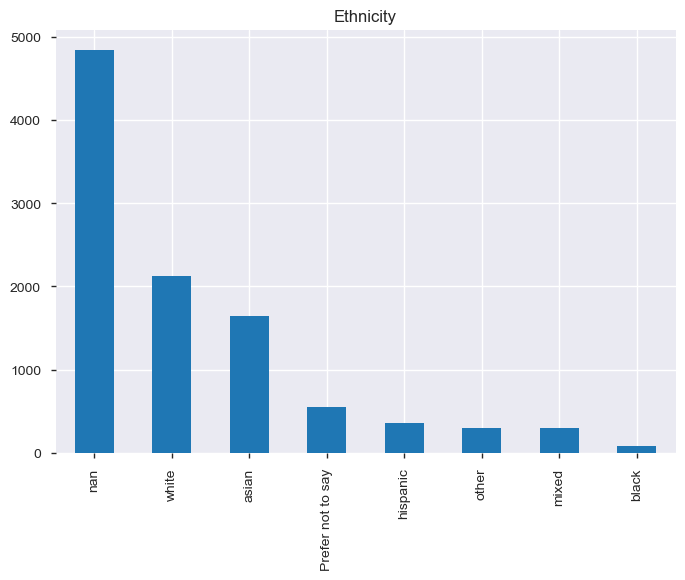

In [10]:
ethnicities = {1:'asian', 2:'black', 3:'hispanic', 4:'white', 5:'mixed', 6:'other', 7:'Prefer not to say'}
all_data.ethnicity.replace(ethnicities, inplace=True)
all_data.ethnicity.value_counts(dropna=False).plot(kind='bar', title='Ethnicity')

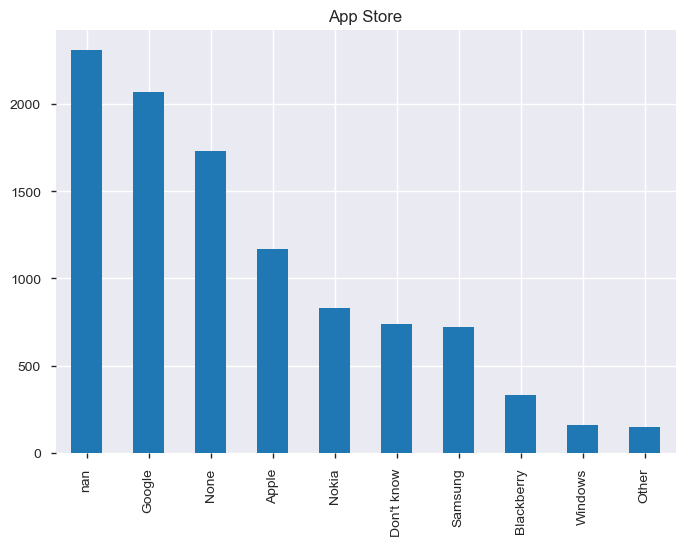

In [11]:
appstores = {1:'Apple', 2:'Blackberry', 3:'Google', 4:'Nokia', 5:'Samsung', 6:'Windows', 7:'None', 8:"Don't know", 9:'Other', 10:'None'}
all_data.app_store.replace(appstores, inplace=True)
all_data.app_store.value_counts(dropna=False).plot(kind='bar', title='App Store')

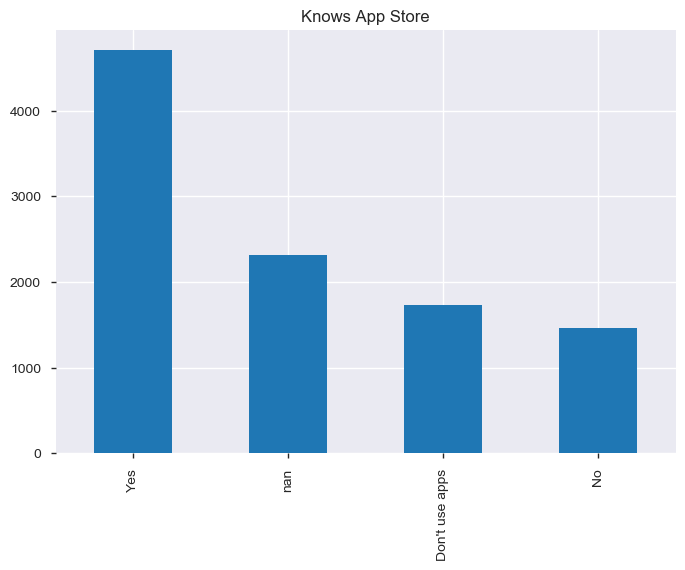

In [12]:
knows_app_store_dict = {0: "Don't use apps", 1: 'Yes', 2: 'No'}
all_data.knows_app_store.replace(knows_app_store_dict, inplace=True)
all_data.knows_app_store.value_counts(dropna=False).plot(kind='bar', title='Knows App Store')

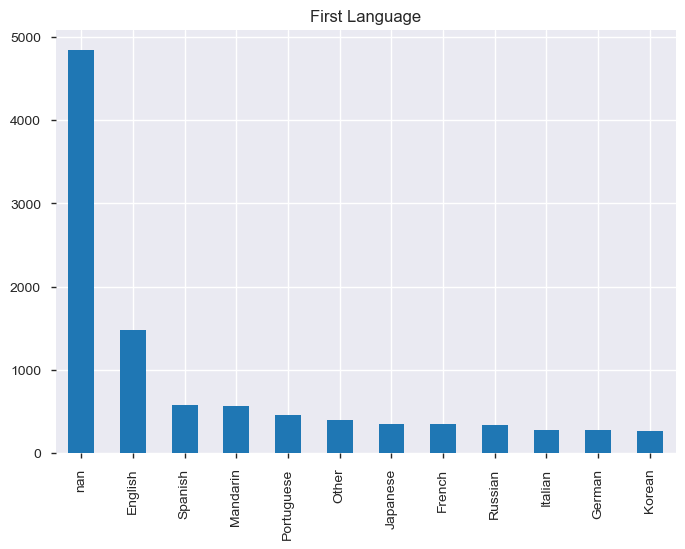

In [13]:
langs = {1:'English', 2:'French', 3:'German', 4:'Italian', 5:'Japanese', 6:'Korean', 7:'Mandarin', 8:'Portuguese', 9:'Russian', 10:'Spanish', 11:'Other'}
all_data.first_language.replace(langs, inplace=True)
all_data.first_language.value_counts(dropna=False).plot(kind='bar', title='First Language')

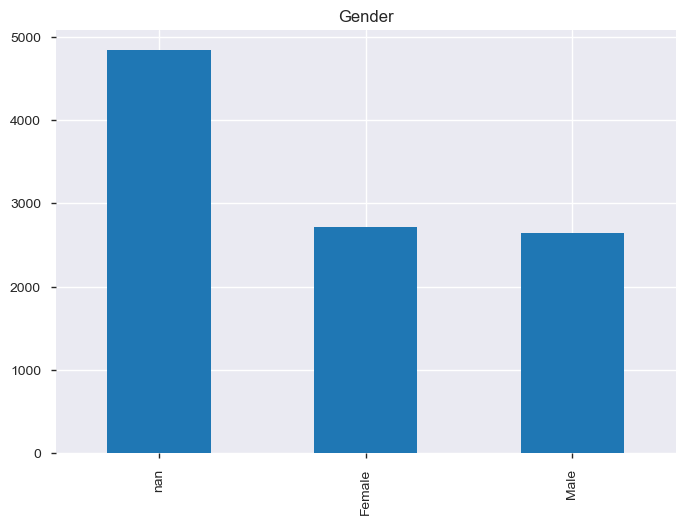

In [14]:
genders = {1:'Male', 2:'Female'}
all_data.gender.replace(genders, inplace=True)
all_data.gender.value_counts(dropna=False).plot(kind='bar', title='Gender')

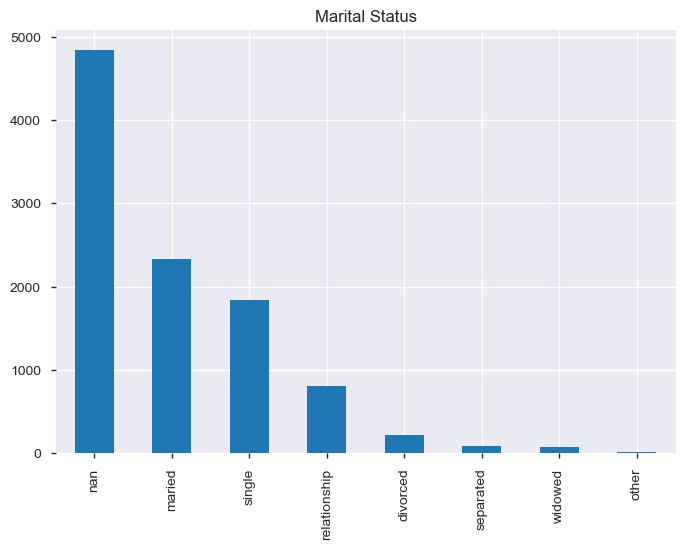

In [15]:
mar_status = {1:'relationship', 2:'single', 3:'maried', 4:'divorced', 5:'widowed', 6:'separated', 7:'other'}
all_data.marital_status.replace(mar_status, inplace=True)
all_data.marital_status.value_counts(dropna=False).plot(kind='bar', title='Marital Status')

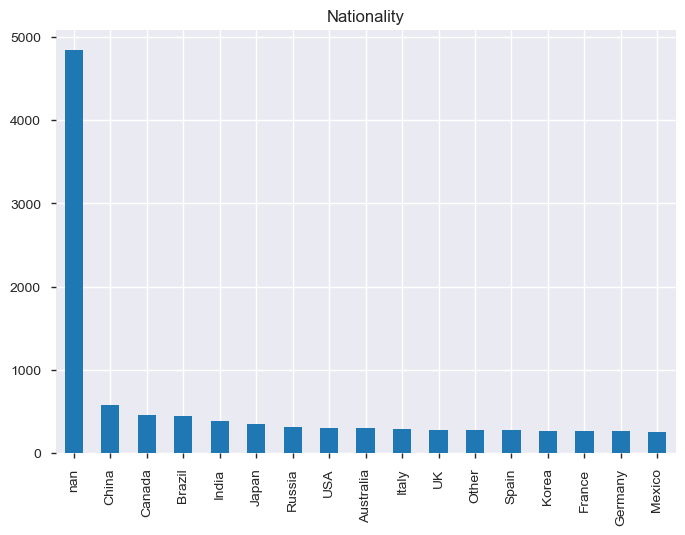

In [16]:
nationalities = {1:'USA', 2:'Australia', 3:'Brazil', 4:'UK', 5:'Canada', 6:'China', 7:'France', 8:'Germany', 9:'India', 10:'Italy', 11:'Japan', 12:'Mexico', 13:'Russia', 14:'Korea', 15:'Spain', 16:'Other'}
all_data.nationality.replace(nationalities, inplace=True)
all_data.nationality.value_counts(dropna=False).plot(kind='bar', title='Nationality')

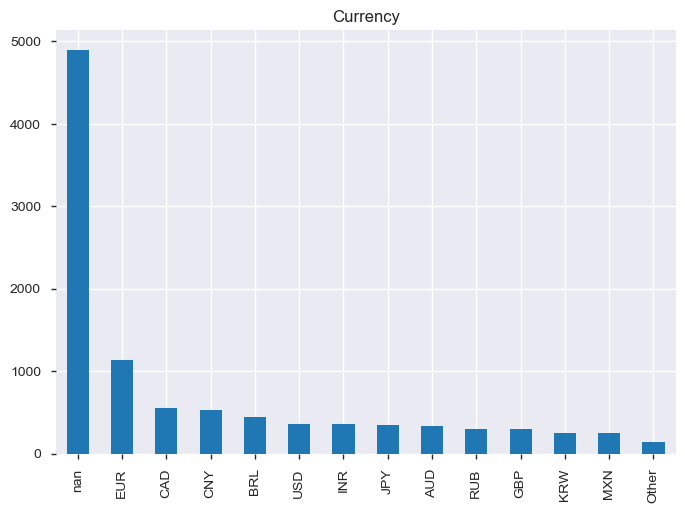

In [17]:
currencies = {1:'AUD', 2:'BRL', 3:'GBP', 4:'CAD', 5:'CNY', 6:'EUR', 7:'INR', 8:'JPY', 9:'MXN', 10:'RUB', 11:'KRW', 12:'USD', 13:'Other'}
all_data.currency.replace(currencies, inplace=True)
all_data.currency.value_counts(dropna=False).plot(kind='bar', title='Currency')

**Cleaning string inputted 'Manufacturer' column into categorical column**

Survey takers manually inpuuted the phone manufacturer in English and many other languages. Here, we have tried to combine them together using a simple yet strict .str.startswith method.

In [18]:
all_data.manufacturer = all_data.manufacturer.str.lower()

In [19]:
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('sa', na=False),'samsung')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('三星', na=False),'samsung')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('삼성', na=False),'samsung')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('самсун', na=False),'samsung')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('no', na=False),'nokia')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('诺基亚', na=False),'nokia')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('ноки', na=False),'nokia')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('so', na=False),'sony')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('ip', na=False),'apple')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('ap', na=False),'apple')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('苹果', na=False),'apple')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('애플', na=False),'apple')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('lg', na=False),'lg')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('htc', na=False),'htc')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('bl', na=False),'blackberry')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('mo', na=False),'motorola')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('摩托罗', na=False),'motorola')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('富士通', na=False),'fujitsu')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('シャープ', na=False),'sharp')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('pan', na=False),'panasonic')
all_data.manufacturer = all_data.manufacturer.where(~all_data.manufacturer.str.startswith('パナソニ', na=False),'panasonic')

In [20]:
all_data.manufacturer = all_data.manufacturer.where((all_data.manufacturer.isin(['samsung', 'nokia', 'sony', 'apple', 'lg', 'htc', 'blackberry', 'motorola', 'fujitsu', 'sharp', 'panasonic']) | all_data.manufacturer.isnull()), 'others')

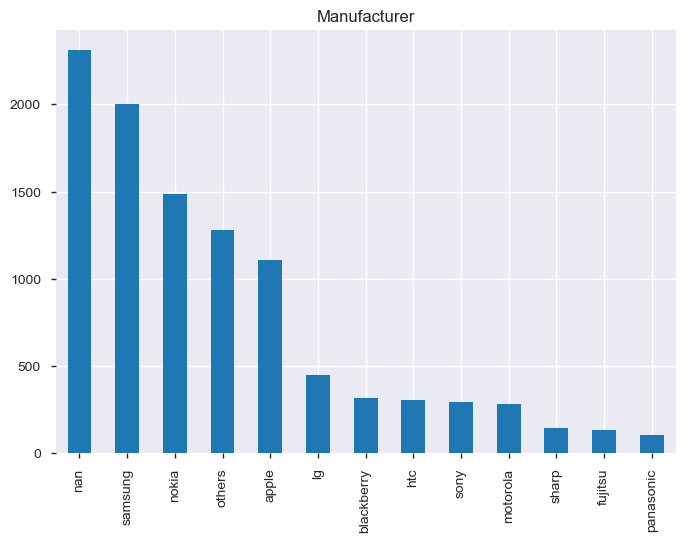

In [21]:
all_data.manufacturer.value_counts(dropna=False).plot(kind='bar', title='Manufacturer')

**Convert the dataframe to an excel file**

In [22]:
all_data.to_excel('./Data/clean_data.xlsx')

**Convert the dataframe to a pickle file**

In [23]:
all_data.to_pickle('./Data/clean_data.pkl')